In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_excel('flight_fare.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Basic check

In [11]:
df.shape

(10683, 11)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Exploratory Data Analysis

In [14]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [15]:
df['Total_Stops'] = df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

In [16]:
df1=df.drop(['Date_of_Journey','Route','Arrival_Time','Dep_Time','Additional_Info'],axis=1)

In [17]:
df1.isnull().sum()

Airline        0
Source         0
Destination    0
Duration       0
Total_Stops    0
Price          0
dtype: int64

In [18]:
df1.head()

,Airline,Source,Destination,Duration,Total_Stops,Price
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302


In [19]:
df1['Total_Stops'].value_counts()

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [20]:
df1.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


# Uni Variate Analysis

In [22]:
import sweetviz as sv
report=sv.analyze(df1)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


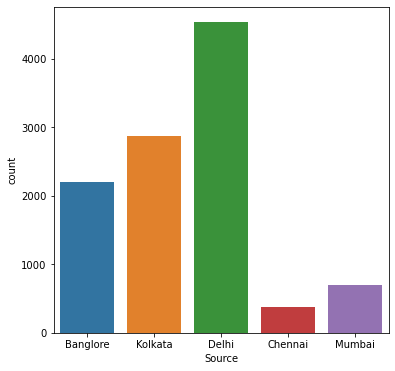

In [11]:
plt.figure(figsize=(6,6))
sns.countplot(df1['Source'])
plt.show()

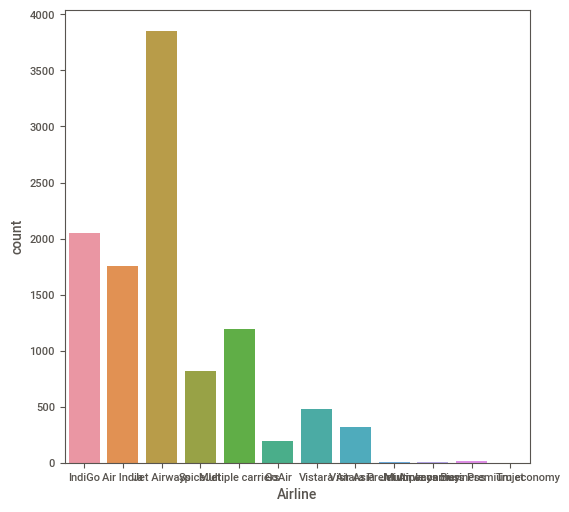

In [25]:
plt.figure(figsize=(6,6))
sns.countplot(df1['Airline'])
plt.show()

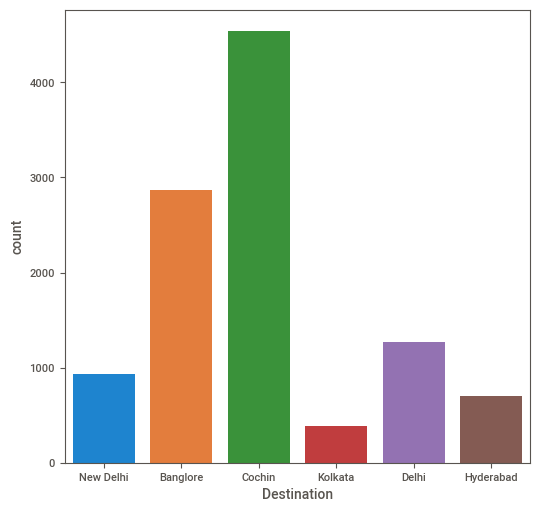

In [26]:
plt.figure(figsize=(6,6))
sns.countplot(df1['Destination'])
plt.show()

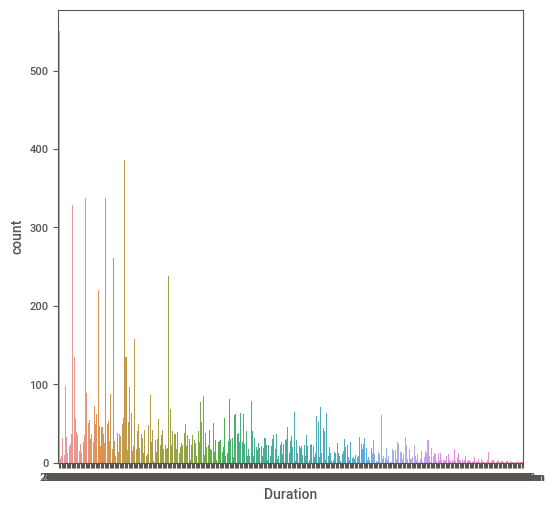

In [27]:
plt.figure(figsize=(6,6))
sns.countplot(df1['Duration'])
plt.show()

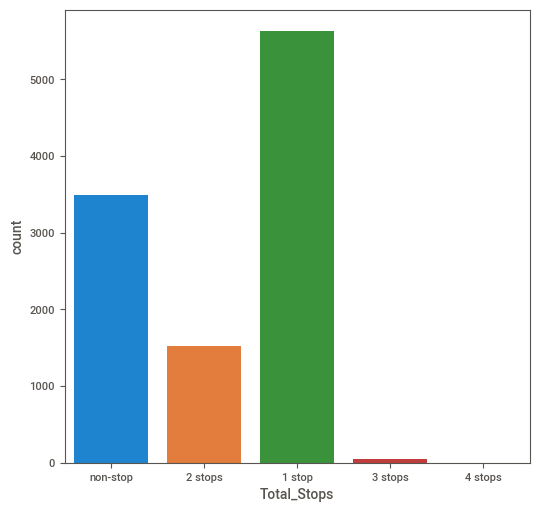

In [28]:
plt.figure(figsize=(6,6))
sns.countplot(df1['Total_Stops'])
plt.show()

# Bi-variate Analysis

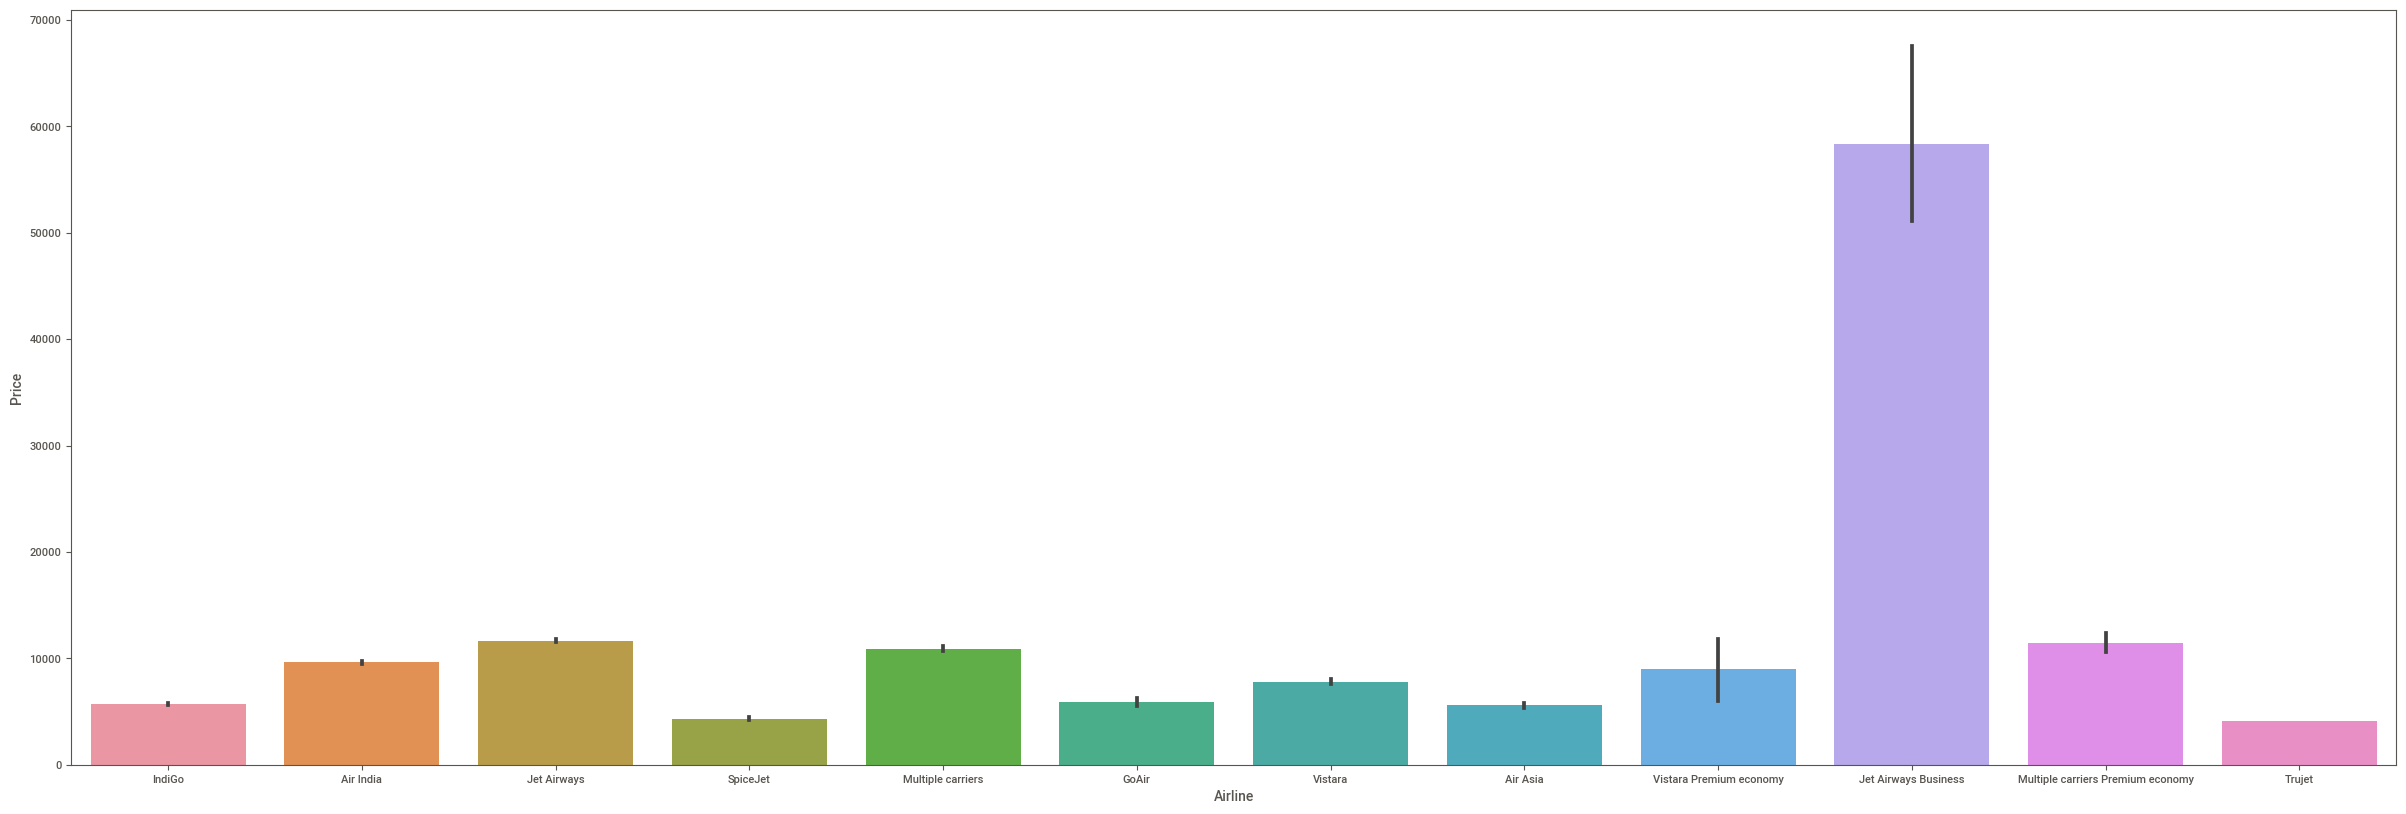

In [29]:
plt.figure(figsize=(30,10))
sns.barplot(x="Airline",y='Price', data=df1)
plt.show()

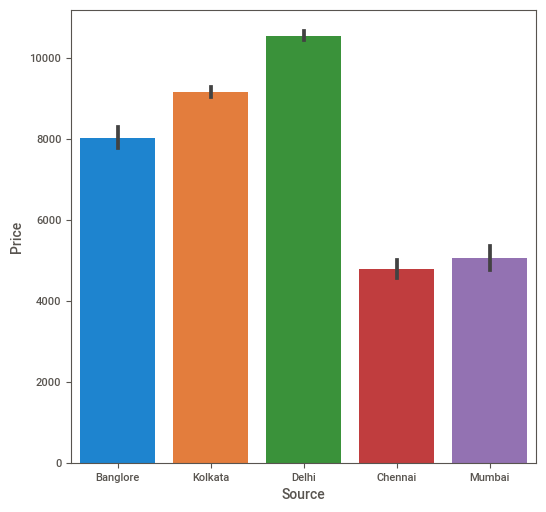

In [35]:
plt.figure(figsize=(6,6))
sns.barplot(x="Source",y='Price', data=df1)
plt.show()

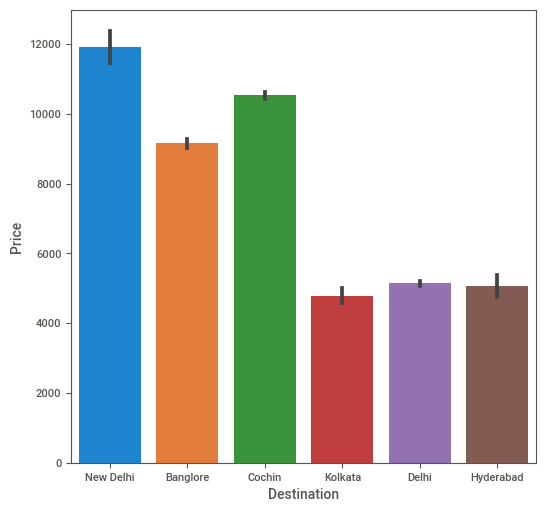

In [36]:
plt.figure(figsize=(6,6))
sns.barplot(x="Destination",y='Price', data=df1)
plt.show()

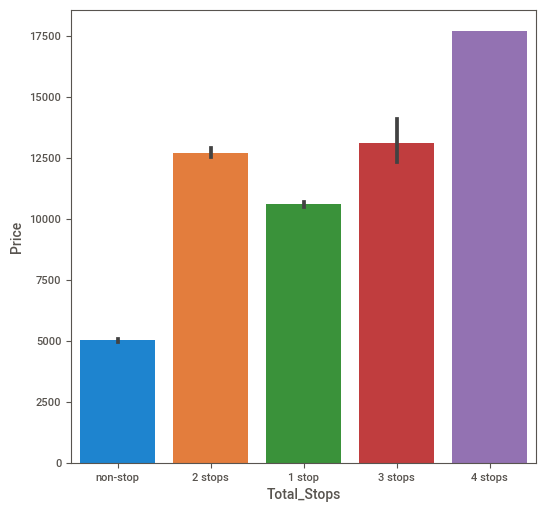

In [37]:
plt.figure(figsize=(6,6))
sns.barplot(x="Total_Stops",y='Price', data=df1)
plt.show()

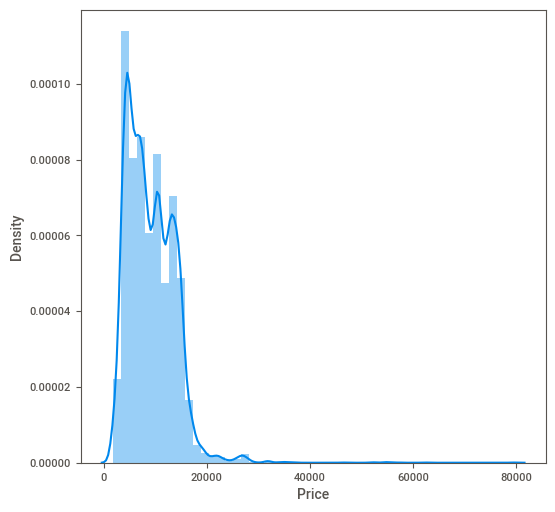

In [32]:
plt.figure(figsize=(6,6))
sns.distplot(df1['Price'])
plt.show()

In [33]:
df1['Price'].skew()

1.8125523782189141

In [34]:
df1['Price'].describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

In [38]:
# Assigning and converting Duration column into list
duration = list(df1["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour


In [39]:
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [40]:
df1["Duration_hours"] = duration_hours
df1["Duration_mins"] = duration_mins

df1=df1.drop(['Duration'],axis=1)

In [41]:
df1.replace({'Total_Stops':{'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}},inplace=True)

In [42]:
#done categorical variable to dummy variable by one hot encoding
Airline = df1[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)


Source = df1[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)


Destination = df1[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first= True)

In [43]:
df1.head()

,Airline,Source,Destination,Total_Stops,Price,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,2,50
1,Air India,Kolkata,Banglore,2,7662,7,25
2,Jet Airways,Delhi,Cochin,2,13882,19,0
3,IndiGo,Kolkata,Banglore,1,6218,5,25
4,IndiGo,Banglore,New Delhi,1,13302,4,45


In [44]:
# Concatenate dataframe --> fare + Airline + Source + Destination
df1 = pd.concat([df1, Airline, Source, Destination], axis = 1)

In [45]:
df1.head()

,Airline,Source,Destination,Total_Stops,Price,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,2,50,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,7,25,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,19,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,5,25,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,4,45,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [46]:
df1=df1.drop(['Airline','Source','Destination'],axis=1)

In [47]:
df1.head(5)

,Total_Stops,Price,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,2,50,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,7,25,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,19,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,25,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,4,45,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Feature Engineering

<AxesSubplot:>

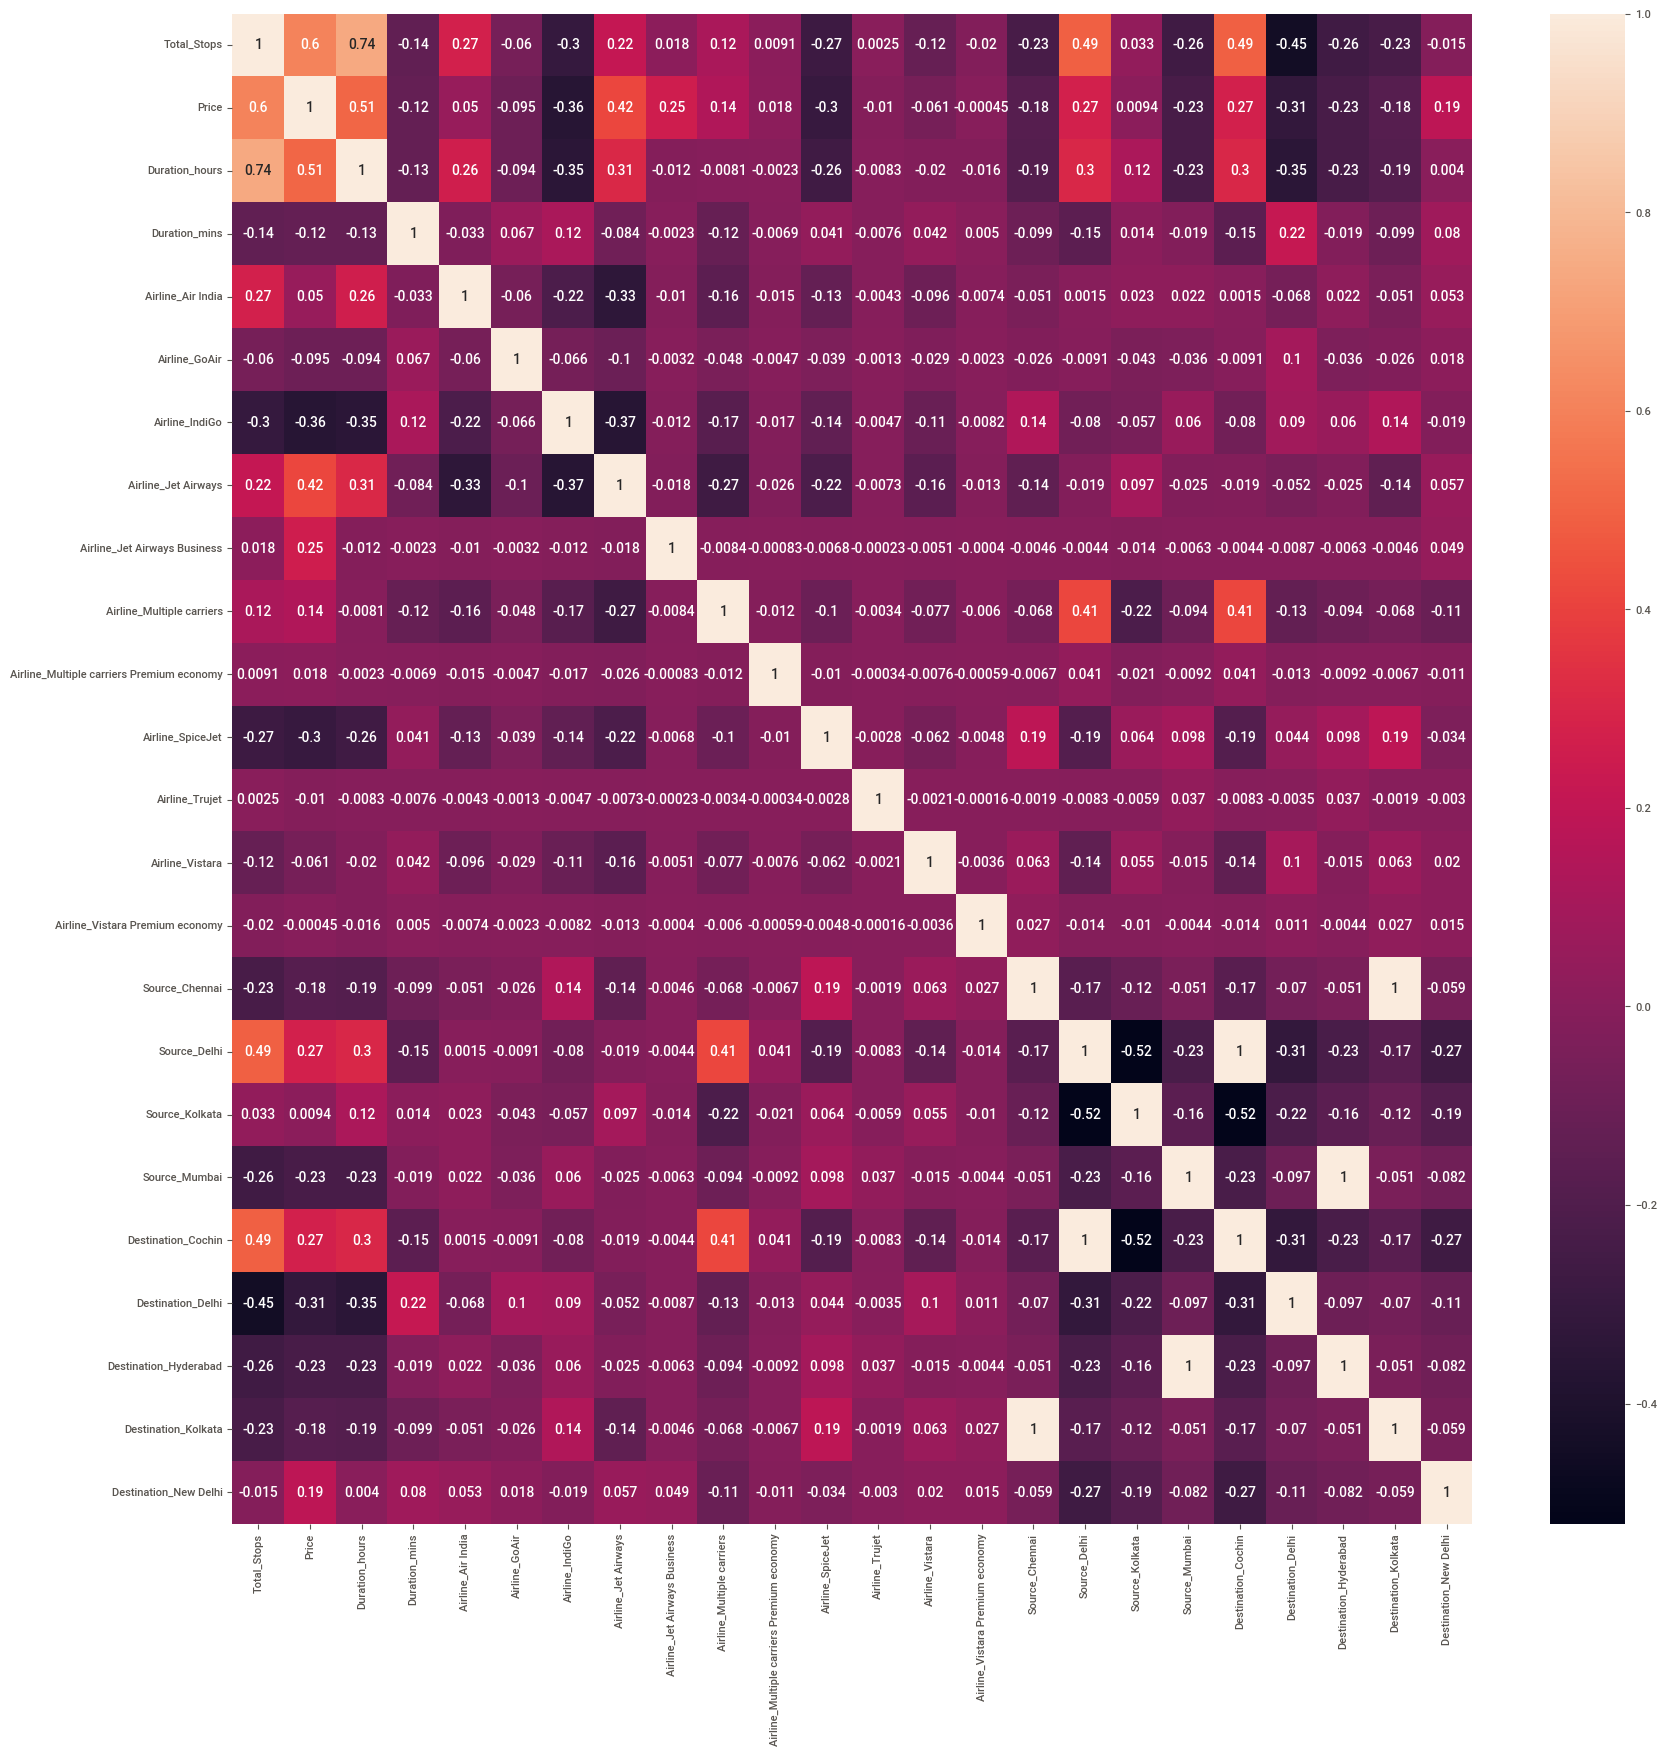

In [49]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True)

In [52]:
x=df1.drop('Price',axis=1)
y=df1['Price']

In [53]:
x.head()

,Total_Stops,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,2,50,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,7,25,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,19,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,5,25,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,4,45,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=0)

# Scaling Data

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# MODEL BUILDING

# Linner Regressior

In [56]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [57]:
from sklearn.metrics import r2_score
r1 = r2_score(y_test,y_pred)
r1

0.5428060466293192

# Decission Tree

In [58]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth = 3)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [59]:
y_pred = dt.predict(x_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2

0.4649580275654245

# Random forest

In [60]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth = 3, n_estimators=100)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
from sklearn.metrics import r2_score
r3 = r2_score(y_test,y_pred)
r3

0.4881584997294425

# KNN

In [61]:
from sklearn.neighbors import KNeighborsRegressor

In [62]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
from sklearn.metrics import r2_score
r4 = r2_score(y_test,y_pred)
r4

0.5499797715248407

# XGboost regressior

In [63]:
from xgboost import XGBRFRegressor

In [64]:
gbr = XGBRFRegressor(max_depth=2, n_estimators=100, learning_rate =.2)
gbr.fit(x_train,y_train)

y_pred = gbr.predict(x_test)
from sklearn.metrics import r2_score
r5 = r2_score(y_test,y_pred)
r5

-2.422248187304758

In [65]:
# Model Results
metric_results= {'Model': ['linear Regression','Decision Tree','RandomForest','KNeighbors','GradientBoosting'], 
                 'R Square': [r1, r2, r3,r4,r5]}
metrics= pd.DataFrame(metric_results)
metrics

,Model,R Square
0,linear Regression,0.542806
1,Decision Tree,0.464958
2,RandomForest,0.488158
3,KNeighbors,0.549980
4,GradientBoosting,-2.422248


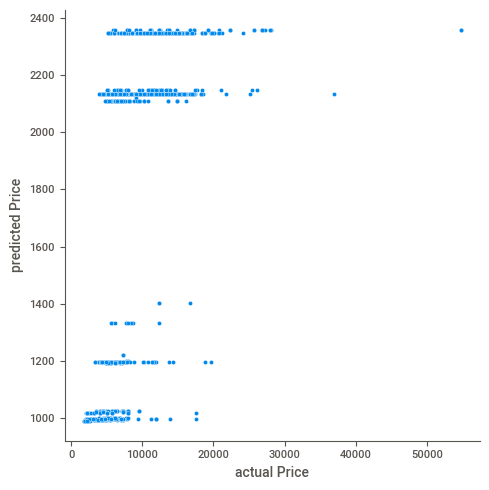

In [66]:
prediction= pd.DataFrame({'actual Price': y_test, 'predicted Price': y_pred})
sns.relplot(data=prediction, x='actual Price', y='predicted Price')

In [67]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 7382.967149348029
MSE: 72461883.80217089
RMSE: 8512.454628494115
